50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950


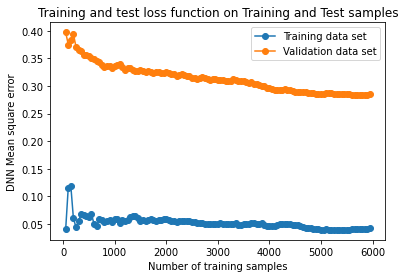

In [1]:
# -*- coding: utf-8 -*-
"""ML_COURSEBARI.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1em4lHGCvzau6VcGXR63nYVqHQm_hQAoa
"""

# KFJ14MAY2022; practice Keras DNN
# BRUFRA16MAY2022; practice Keras DNN, scikit-learn BDT
import numpy as np
from numpy import loadtxt
from matplotlib import pyplot as plt
import tensorflow
from keras.models import  Sequential
#from keras.models import Sequential  <<== errors
from keras.layers import Dense, Dropout
#from keras.layers import Dense   <<== gave errors
import keras
from sklearn.metrics import roc_curve, auc, mean_squared_error  ## To show results
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from numpy.random import seed
from tensorflow import random as tf_random
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
seed(7)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(7)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf_random.set_seed(7)
EPOCHS=500
LOQUACIOUS=0
model_file = 'ANN_model.h5'
##Call functions implementation to monitor the chosen metrics
checkpoint = ModelCheckpoint(filepath = model_file,
                                             monitor = 'val_loss',
                                             mode='min',
                                             save_best_only = True)

#Stop training when a monitored metric has stopped improving
early_stop = EarlyStopping(monitor = 'val_loss',
                                           mode='min',# quantity that has to be monitored(to be minimized in this case)
                              patience = 50, # Number of epochs with no improvement after which training will be stopped.
                              min_delta = 1e-5,
                              restore_best_weights = True) # update the model with the best-seen weights

#Reduce learning rate when a metric has stopped improving
reduce_LR = ReduceLROnPlateau( monitor = 'val_loss',
                                              mode='min',# quantity that has to be monitored
                                              min_delta=1e-5,
                                              factor = 0.1, # factor by which LR has to be reduced...
                                              patience = 50, #...after waiting this number of epochs with no improvements 
                                              #on monitored quantity
                                              min_lr= 0.0001 ) 


callback_list = [reduce_LR, early_stop, checkpoint]
dat = loadtxt('NormDat_train.txt', delimiter=' ')
y = dat[:,0]
x = dat[:, 1:24]

## Load test data into arrays.
test = loadtxt('NormDat_test.txt', delimiter=' ')
ytst = test[:,0]
xtst = test[:, 1:24]

## Set up classifier structure
cl1 = Sequential()  ## type of classifier
cl1.add(Dense( 100,  activation='selu'))    ## First hidden layer # of nodes; densely connected
cl1.add(Dropout(rate=0.1))
cl1.add(Dense(  50,  activation='selu'))    ## 2nd layer
cl1.add(Dropout(rate=0.1))
#cl1.add(Dense(   40,  activation='selu'))
cl1.add(Dense(   1,  activation='sigmoid')) ## Output layer uses sigmoid for classification


## Set up classifier structure
cl = Sequential()  ## type of classifier
cl.add(Dense( 100,  activation='selu'))    ## First hidden layer # of nodes; densely connected
cl.add(Dropout(rate=0.1))
cl.add(Dense(  50,  activation='selu'))    ## 2nd layer
cl.add(Dropout(rate=0.1))
#cl.add(Dense(   40,  activation='selu'))
cl.add(Dense(   1,  activation='sigmoid')) ## Output layer uses sigmoid for classification

## Try out different loss functions, some better, some worse.
#cl.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )  ## <<==good

cl.compile( loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'] )   ## <<== good
#cl1.compile( loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'] )   ## <<== good

#cl.compile( loss='Hinge', optimizer='adam', metrics=['accuracy'] )  ##<<== not so good


Chunk=50         # how many events per chunk
NumChuncks=120  #     .... times this determines number of training events used.
Scores_train=[]
mse_train=[]
mse_test=[]
Scores_test=[]
Scores_trainsize=[]
for iter in range(1, NumChuncks):
    TrainSize= Chunk * iter
    print(TrainSize)
    y_train = np.empty((TrainSize))  ## Reserve memory for trainng data...
    y_train = y[0:TrainSize]
    X_train = np.zeros((TrainSize, 23))
    for row in range(TrainSize):
        X_train[row] = x[row]
    cl.fit(X_train,y_train,epochs=EPOCHS, batch_size=TrainSize, verbose=LOQUACIOUS, validation_split=0.1) # Fitting procedure which determines the MLP weights by using a fraction TrainSize of training data
    y_score_test = cl.predict(xtst)
    y_score_train = cl.predict(X_train)
    #TrainScore = cl.score(X_train, y_train)
    #TestScore  = cl.score( xtst, ytst)
    Mse_train = mean_squared_error(y_train,y_score_train)
    Mse_test = mean_squared_error(ytst,y_score_test)
    Scores_trainsize.append(iter*1.0*Chunk)
    #Scores_train.append(TrainScore)
    #Scores_test.append(TestScore)
    mse_train.append(Mse_train)
    mse_test.append(Mse_test)
    #print("ITER: ", iter, "TrainScore: ", "%.5f" % TrainScore, "TestScore: ", "%.5f" %  TestScore  )

#############################################################################################################################
## Plotting the Mean square error loss function vs size of training sample, increasing this number in steps of Chunk number##
#############################################################################################################################
plt.clf() # clean the figure
plt.plot(Scores_trainsize,mse_train,"o-",label = "Training data set")
plt.plot(Scores_trainsize,mse_test,"o-",label = "Test data set")
## naming the x axis
plt.xlabel('Number of training samples')
## naming the y axis
plt.ylabel('DNN Mean square error')
## giving a title to my graph
plt.title('Training and test loss function on Training and Test samples')
## show a legend on the plot
plt.legend(['Training data set','Validation data set'])
plt.savefig('numbertrainingsamples_loss_mse.png', dpi=300, bbox_inches='tight')
#plt.show()
#plt.close()


In [2]:
import matplotlib.animation as animation

In [3]:

################## TRAINING PROCEDURE ##################
## Set up classifier structure
cl2 = Sequential()  ## type of classifier
cl2.add(Dense( 100,  activation='selu'))    ## First hidden layer # of nodes; densely connected
cl2.add(Dropout(rate=0.1))
cl2.add(Dense(  50,  activation='selu'))    ## 2nd layer
cl2.add(Dropout(rate=0.1))
#cl2.add(Dense(   40,  activation='selu'))
cl2.add(Dense(   1,  activation='sigmoid')) ## Output layer uses sigmoid for classification
## Try out different loss functions, some better, some worse.
cl2.compile( loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'] )   ## <<== good


# simulate new data coming in
X = np.linspace(0.0, 1.0, 100) #100 numbers between 0 and 1
EPOCHS = 1000
clips=[]
for epoch in np.arange(1, EPOCHS):
        # simulate new data coming in
        plt.clf()
        cl2.fit(x, y, batch_size=len(y), verbose=0, validation_split=0.1, callbacks = callback_list)
        score_mp_sig_train = []
        score_mp_bkg_train = []
        x_predicted = cl2.predict(x)
        for i in range(len(y)): #xtst
          if y[i] == 1:
            score_mp_sig_train.append(x_predicted[i])
          if y[i] == 0:
            score_mp_bkg_train.append(x_predicted[i])
        #plt.hist(np.asarray(score_mp_sig_train), bins=X, label='train_sig',histtype='step',log=True,density=1)
        hist_train_mp_sig = plt.hist(np.asarray(score_mp_sig_train), bins=X, label='train_sig',histtype='step',log=True,density=1)
        hist_train_mp_bkg = plt.hist(np.asarray(score_mp_bkg_train), bins=X, label='train_bkg',histtype='step',log=True,density=1) 
        plt.xlabel('ANN score')
        plt.ylabel('Frequency')   
        plt.title(f"Epoch {epoch} ANN score normalized distribution on the whole dataset",fontsize=12,fontweight='bold', color='r') 
        plt.legend( loc='upper right',prop={'size': 8} )
        plt.savefig(f"ann_score_{epoch}_v1.png")
        clips.append(f"ann_score_{epoch}_v1.png")
        plt.clf()
#simulation = animation.FuncAnimation(fig, updateData, frames=10)
plt.show()
#plt.legend( loc='upper right',prop={'size': 8} )
#plt.savefig(f"ann_score_{epoch}.png")
#plt.clf()

<Figure size 432x288 with 0 Axes>

In [4]:
import os
from moviepy.editor import *

clips_duration = []
for filename in clips:
  if filename.endswith(".png") and filename.startswith("ann_score"):
    clips_duration.append(ImageClip(filename).set_duration(1))

print(clips)
video = concatenate(clips_duration, method="compose")
video.write_videofile('test1.mp4', fps=24)


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2416640/45929032 bytes (5.3%)5947392/45929032 bytes (12.9%)9306112/45929032 bytes (20.3%)12640256/45929032 bytes (27.5%)15966208/45929032 bytes (34.8%)19111936/45929032 bytes (41.6%)22364160/45929032 bytes (48.7%)25903104/45929032 bytes (56.4%)29130752/45929032 bytes (63.4%)32415744/45929032 bytes (70.6%)35807232/45929032 bytes (78.0%)39141376/45929032 bytes (85.2%)

100%|█████████▉| 23976/23977 [05:13<00:00, 76.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test1.mp4 



751/751 [==============================] - 1s 2ms/step - loss: 0.1878 - accuracy: 0.7206
Training Done
Start RF training
Start BDT training
Training Done
[0.6015394] 1.0
[0.39740753] 0.0
[0.48667675] 0.0
[0.4402949] 1.0
[0.16709232] 0.0
[0.62808275] 1.0
[0.8012257] 1.0
[0.118633] 0.0
[0.7377485] 1.0
[0.34116665] 0.0
[0.59327036] 0.0
[0.2542749] 0.0
[0.32597882] 1.0
[0.98753333] 1.0
[0.5964066] 0.0
[0.57513255] 0.0
[0.7072145] 1.0
[0.67513776] 1.0
[0.43544963] 0.0
[0.4032448] 1.0


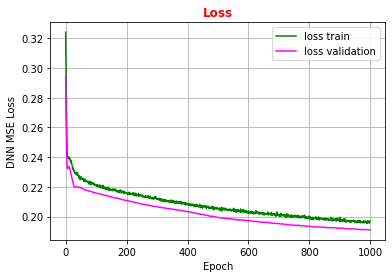

In [5]:
################## TRAINING PROCEDURE ##################
## Set up classifier structure
cl3 = Sequential()  ## type of classifier
cl3.add(Dense( 100,  activation='selu'))    ## First hidden layer # of nodes; densely connected
cl3.add(Dropout(rate=0.1))
cl3.add(Dense(  50,  activation='selu'))    ## 2nd layer
cl3.add(Dropout(rate=0.1))
#cl3.add(Dense(   40,  activation='selu'))
cl3.add(Dense(   1,  activation='sigmoid')) ## Output layer uses sigmoid for classification
## Try out different loss functions, some better, some worse.
cl3.compile( loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'] )   ## <<== good

mlpfitted = cl3.fit(x,y,epochs=EPOCHS, batch_size=len(y), verbose=LOQUACIOUS, validation_split=0.1, callbacks = callback_list)
cl3.evaluate(x,y)
print("Training Done")
    
# plot the loss fuction vs epoch during the training phase
# the plot of the loss function on the validation set is also computed and plotted
plt.clf()
plt.rcParams['figure.figsize'] = (13,6)
plt.plot(mlpfitted.history['loss'], label='loss train',color='green')
plt.plot(mlpfitted.history['val_loss'], label='loss validation',color='magenta')
plt.title("Loss", fontsize=12,fontweight='bold', color='r')
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('DNN MSE Loss')
plt.grid("True")
plt.savefig("loss_vs_epocs.png", dpi=300)
#plt.show()
#plt.close()

#bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=700)
bdt = GradientBoostingClassifier(random_state=7)
rf = RandomForestClassifier(n_estimators=300,random_state=7, max_depth= 7,bootstrap=True)
#rf = RandomForestClassifier( n_estimators=300,criterion='gini', verbose=0 , min_samples_split=300, max_depth= 5,min_samples_leaf=200, max_features=5, bootstrap=True,random_state=7 )
print("Start RF training")
rf.fit(x,y)
print("Start BDT training")
bdt.fit(x,y)
print("Training Done")

OOB_train = np.zeros((len(x), 2))  ## Set up to collect Out-Of-Bag results
OOBResults_train = cl3.predict(x)
for i in range(len(y)):
    OOB_train[i,0] = y[i]
    OOB_train[i,1] = OOBResults_train[i]

np.savetxt('OOB_train.txt', OOB_train , fmt="%d  %.7f")  ##<<== test results are saved here!
OOB_test = np.zeros((len(ytst), 2))  ## Set up to collect Out-Of-Bag results
OOBResults_test = cl3.predict(xtst)  ## Get predictions from NN on test data.

for i in range(len(ytst)):      ## Put results into array for plotting, writing,...
    OOB_test[i,0] = ytst[i]
    OOB_test[i,1] = OOBResults_test[i]
## Preview
for i in range(20):
    print(OOBResults_test[i], ytst[i]) 
#print("Testing predictions available: \n", cl.evaluate(xtst,ytst) )
np.savetxt('OOB_test.txt', OOB_test , fmt="%d  %.7f")  ##<<== test results are saved here!


[0.5747319269982716, 0.2788293188389779, 0.33355691408981825, 0.42830621191105167, 0.46935170930189773, 0.10935725298222944, 0.5695762280813909, 0.6797993462087849, 0.15829338252977795, 0.47498987777995, 0.17800878278750928, 0.45316748760761116, 0.15424912966631887, 0.16957895870838435, 0.19292878004620387, 0.3533774458904735, 0.4772043623667647, 0.4714073550982335, 0.4790047018282156, 0.6334570276283139, 0.5168197370966546, 0.43823050716775247, 0.4310221210323883, 0.6380008876297352, 0.47150036975309095, 0.15869558459072022, 0.5600906053833326, 0.44802740893184495, 0.26029063571982414, 0.47161743056018773, 0.1990347909544116, 0.25545855451974697, 0.1884608302001265, 0.18976496996573067, 0.32926837475384846, 0.564220518400481, 0.4610002548844406, 0.27697469407296044, 0.4102575140432378, 0.0990886849150533, 0.2269767428439209, 0.5247514688060856, 0.7577252360424513, 0.17895032363152732, 0.3052761054744456, 0.2941640207684187, 0.6535773017268189, 0.47536049820719906, 0.16881793529970127,

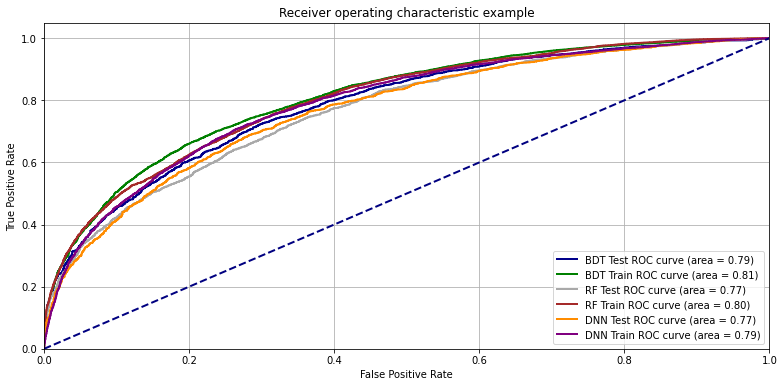

In [6]:


#Plotting ROC curve
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

fpr_test_bdt = dict()
tpr_test_bdt = dict()
roc_auc_test_bdt = dict()
fpr_train_bdt = dict()
tpr_train_bdt = dict()
roc_auc_train_bdt = dict()

fpr_test_rf = dict()
tpr_test_rf = dict()
roc_auc_test_rf = dict()
fpr_train_rf = dict()
tpr_train_rf = dict()
roc_auc_train_rf = dict()
lw=2

fpr_test, tpr_test, _ = roc_curve(ytst, OOBResults_test)
roc_auc_test = auc(fpr_test, tpr_test)
fpr_train, tpr_train, _ = roc_curve(y, OOBResults_train)
roc_auc_train = auc(fpr_train, tpr_train)

y_score_test_bdt = bdt.predict_proba(xtst) # MLP prediction on test data
y_score_training_bdt = bdt.predict_proba(x)# MLP prediction on training data

y_score_test_rf = rf.predict_proba(xtst) # MLP prediction on test data
y_score_training_rf = rf.predict_proba(x)# MLP prediction on training data

fpr_test_bdt, tpr_test_bdt, _ = roc_curve(ytst, y_score_test_bdt[:,1])
roc_auc_test_bdt = auc(fpr_test_bdt, tpr_test_bdt)
fpr_train_bdt, tpr_train_bdt, _ = roc_curve(y, y_score_training_bdt[:,1])
roc_auc_train_bdt = auc(fpr_train_bdt, tpr_train_bdt)

fpr_test_rf, tpr_test_rf, _ = roc_curve(ytst, y_score_test_rf[:,1])
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)
fpr_train_rf, tpr_train_rf, _ = roc_curve(y, y_score_training_rf[:,1])
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

score_mp_sig_test = []
score_mp_sig_train = []
score_mp_bkg_train = []
score_mp_bkg_test = []
score_bdt_sig_test = []
score_bdt_sig_train = []
score_bdt_bkg_train = []
score_bdt_bkg_test = []
score_rf_sig_test = []
score_rf_sig_train = []
score_rf_bkg_train = []
score_rf_bkg_test = []
for i in range(len(ytst)): #xtst
  if ytst[i] == 1:
    score_mp_sig_test.append(OOBResults_test[i])
    score_bdt_sig_test.append(y_score_test_bdt[i,1])
    score_rf_sig_test.append(y_score_test_rf[i,1])
  if ytst[i] == 0:
    score_mp_bkg_test.append(OOBResults_test[i])
    score_bdt_bkg_test.append(y_score_test_bdt[i,1])
    score_rf_bkg_test.append(y_score_test_rf[i,1])
for i in range(len(y)): #xtst
  if y[i] == 1:
    score_mp_sig_train.append(OOBResults_train[i])
    score_bdt_sig_train.append(y_score_training_bdt[i,1])
    score_rf_sig_train.append(y_score_training_rf[i,1])
  if y[i] == 0:
    score_mp_bkg_train.append(OOBResults_train[i])
    score_bdt_bkg_train.append(y_score_training_bdt[i,1])
    score_rf_bkg_train.append(y_score_training_rf[i,1])

print(score_bdt_bkg_train)
print(score_bdt_sig_train)
print(score_bdt_bkg_test)
print(score_bdt_sig_test)
print(len(score_bdt_bkg_test))
print(len(score_bdt_sig_test))
print(len(score_bdt_bkg_train))
print(len(score_bdt_sig_train))
print(score_mp_bkg_train)
print(score_mp_sig_train)
print(score_mp_bkg_test)
print(score_mp_sig_test)
print(len(score_mp_bkg_test))
print(len(score_mp_sig_test))
print(len(score_mp_bkg_train))
print(len(score_mp_sig_train))

plt.figure()
plt.plot(fpr_test_bdt,tpr_test_bdt,color="darkblue",lw=lw,label="BDT Test ROC curve (area = %0.2f)" % roc_auc_test_bdt)
plt.plot(fpr_train_bdt,tpr_train_bdt,color="green",lw=lw,label="BDT Train ROC curve (area = %0.2f)" % roc_auc_train_bdt)
plt.plot(fpr_test_rf,tpr_test_rf,color="darkgrey",lw=lw,label="RF Test ROC curve (area = %0.2f)" % roc_auc_test_rf)
plt.plot(fpr_train_rf,tpr_train_rf,color="brown",lw=lw,label="RF Train ROC curve (area = %0.2f)" % roc_auc_train_rf)
plt.plot(fpr_test,tpr_test,color="darkorange",lw=lw,label="DNN Test ROC curve (area = %0.2f)" % roc_auc_test)
plt.plot(fpr_train,tpr_train,color="purple",lw=lw,label="DNN Train ROC curve (area = %0.2f)" % roc_auc_train)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid("True")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.savefig("ROC_curve.png", dpi=300)
#plt.show()


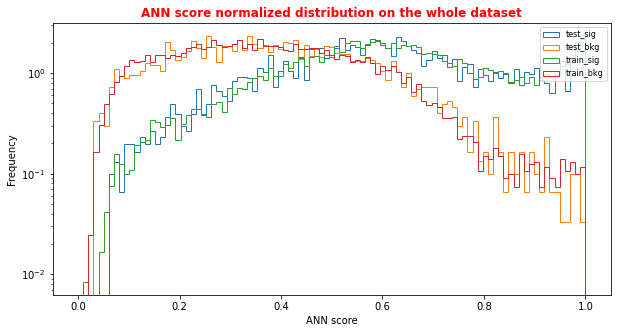

In [7]:
X = np.linspace(0.0, 1.0, 100) #100 numbers between 0 and 1
plt.rcParams['figure.figsize'] = (10,5)
hist_test_mp_sig = plt.hist(np.asarray(score_mp_sig_test), bins=X, label='test_sig',histtype='step',log=True,density=1)
hist_test_mp_bkg = plt.hist(np.asarray(score_mp_bkg_test), bins=X, label='test_bkg',histtype='step',log=True,density=1)
hist_train_mp_sig = plt.hist(np.asarray(score_mp_sig_train), bins=X, label='train_sig',histtype='step',log=True,density=1)
hist_train_mp_bkg = plt.hist(np.asarray(score_mp_bkg_train), bins=X, label='train_bkg',histtype='step',log=True,density=1)
plt.xlabel('ANN score')
plt.ylabel('Frequency')
plt.legend( loc='upper right',prop={'size': 8} )
plt.title('ANN score normalized distribution on the whole dataset',fontsize=12,fontweight='bold', color='r')
plt.savefig("ann_score.png", dpi=300)
plt.show()

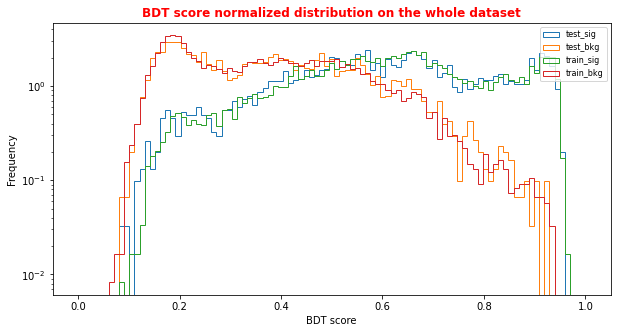

In [8]:
X = np.linspace(0.0, 1.0, 100) #100 numbers between 0 and 1
plt.rcParams['figure.figsize'] = (10,5)
hist_test_bdt_sig = plt.hist(score_bdt_sig_test, bins=X, label='test_sig',histtype='step',log=True,density=1)
hist_test_bdt_bkg = plt.hist(score_bdt_bkg_test, bins=X, label='test_bkg',histtype='step',log=True,density=1)
hist_train_bdt_sig = plt.hist(score_bdt_sig_train, bins=X, label='train_sig',histtype='step',log=True,density=1)
hist_train_bdt_bkg = plt.hist(score_bdt_bkg_train, bins=X, label='train_bkg',histtype='step',log=True,density=1)
plt.xlabel('BDT score')
plt.ylabel('Frequency')
plt.legend( loc='upper right',prop={'size': 8} )
plt.title('BDT score normalized distribution on the whole dataset',fontsize=12,fontweight='bold', color='r')
plt.savefig("bdt_score.png", dpi=300)
plt.show()

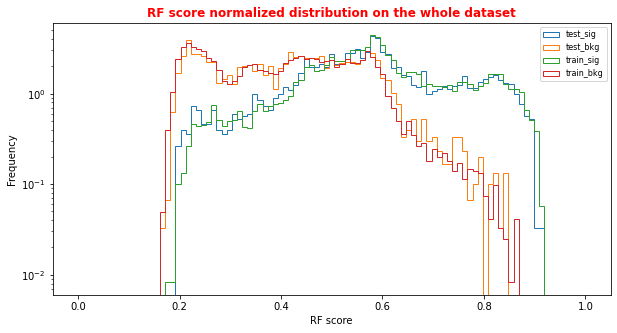

In [9]:
X = np.linspace(0.0, 1.0, 100) #100 numbers between 0 and 1
plt.rcParams['figure.figsize'] = (10,5)
hist_test_rf_sig = plt.hist(score_rf_sig_test, bins=X, label='test_sig',histtype='step',log=True,density=1)
hist_test_rf_bkg = plt.hist(score_rf_bkg_test, bins=X, label='test_bkg',histtype='step',log=True,density=1)
hist_train_rf_sig = plt.hist(score_rf_sig_train, bins=X, label='train_sig',histtype='step',log=True,density=1)
hist_train_rf_bkg = plt.hist(score_rf_bkg_train, bins=X, label='train_bkg',histtype='step',log=True,density=1)
plt.xlabel('RF score')
plt.ylabel('Frequency')
plt.legend( loc='upper right',prop={'size': 8} )
plt.title('RF score normalized distribution on the whole dataset',fontsize=12,fontweight='bold', color='r')
plt.savefig("rf_score.png", dpi=300)
plt.show()

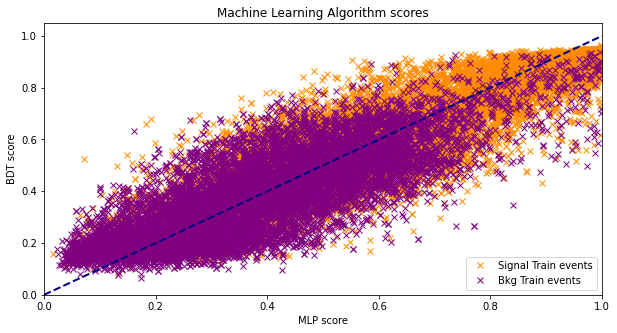

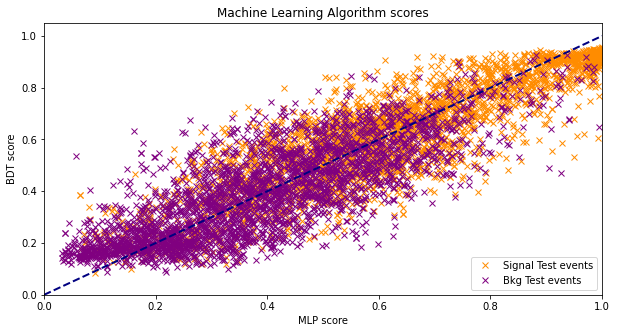

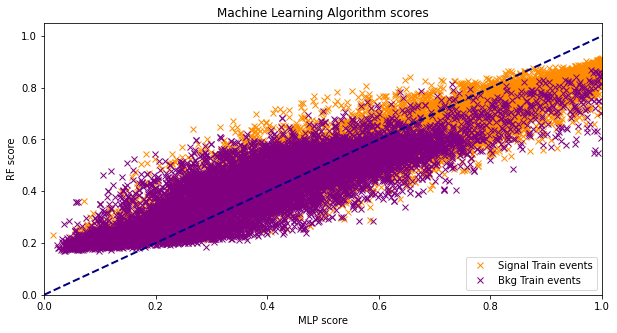

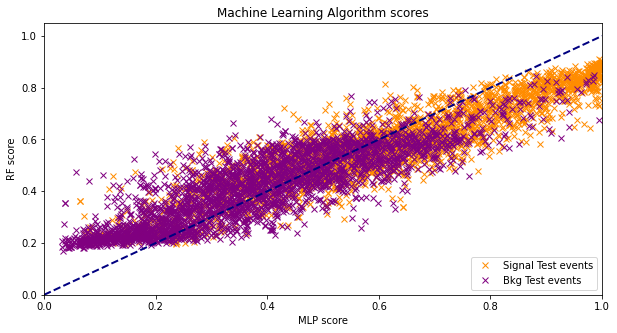

In [10]:

plt.figure()
#plt.plot(score_mp_sig_test,score_bdt_sig_test,"o",color="darkblue",label="Signal Test events")
plt.plot(np.asarray(score_mp_sig_train),score_bdt_sig_train,"x",color="darkorange",lw=lw,label="Signal Train events")
#plt.plot(score_mp_bkg_test,score_bdt_bkg_test,"o",color="darkgreen",label="Bkg Test events")
plt.plot(np.asarray(score_mp_bkg_train),score_bdt_bkg_train,"x",color="purple",lw=lw,label="Bkg Train events")
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("MLP score")
plt.ylabel("BDT score")
plt.legend(loc="lower right")
plt.title("Machine Learning Algorithm scores")
plt.savefig("comparison_scores_mlp_bdt_train.png", dpi=300)
#plt.show()

plt.figure()
#plt.plot(score_mp_sig_test,score_bdt_sig_test,"o",color="darkblue",label="Signal Test events")
plt.plot(np.asarray(score_mp_sig_test),score_bdt_sig_test,"x",color="darkorange",lw=lw,label="Signal Test events")
#plt.plot(score_mp_bkg_test,score_bdt_bkg_test,"o",color="darkgreen",label="Bkg Test events")
plt.plot(np.asarray(score_mp_bkg_test),score_bdt_bkg_test,"x",color="purple",lw=lw,label="Bkg Test events")
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("MLP score")
plt.ylabel("BDT score")
plt.legend(loc="lower right")
plt.title("Machine Learning Algorithm scores")
plt.savefig("comparison_scores_mlp_bdt_test.png", dpi=300)
#plt.show()

plt.figure()
#plt.plot(score_mp_sig_test,score_bdt_sig_test,"o",color="darkblue",label="Signal Test events")
plt.plot(np.asarray(score_mp_sig_train),score_rf_sig_train,"x",color="darkorange",lw=lw,label="Signal Train events")
#plt.plot(score_mp_bkg_test,score_bdt_bkg_test,"o",color="darkgreen",label="Bkg Test events")
plt.plot(np.asarray(score_mp_bkg_train),score_rf_bkg_train,"x",color="purple",lw=lw,label="Bkg Train events")
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("MLP score")
plt.ylabel("RF score")
plt.legend(loc="lower right")
plt.title("Machine Learning Algorithm scores")
plt.savefig("comparison_scores_mlp_rf_train.png", dpi=300)
#plt.show()

plt.figure()
#plt.plot(score_mp_sig_test,score_bdt_sig_test,"o",color="darkblue",label="Signal Test events")
plt.plot(np.asarray(score_mp_sig_test),score_rf_sig_test,"x",color="darkorange",lw=lw,label="Signal Test events")
#plt.plot(score_mp_bkg_test,score_bdt_bkg_test,"o",color="darkgreen",label="Bkg Test events")
plt.plot(np.asarray(score_mp_bkg_test),score_rf_bkg_test,"x",color="purple",lw=lw,label="Bkg Test events")
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("MLP score")
plt.ylabel("RF score")
plt.legend(loc="lower right")
plt.title("Machine Learning Algorithm scores")
plt.savefig("comparison_scores_mlp_rf_test.png", dpi=300)
#plt.show()

# =============================================================================
# plt.figure()
# plt.hist(x=score_mp_bkg_test,bins= 3,facecolor='g', range=[0,1],alpha=0.75,label="Bkg Test events",histtype='bar')
# #plt.hist(score_mp_bkg_train,bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],label="Bkg Train events")
# #plt.hist(score_mp_sig_test,bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],label="Signal Test events")
# #plt.hist(score_mp_sig_train,bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],label="Bkg Test events")
# plt.legend(loc="lower right")
# plt.style.use('ggplot')
# plt.xlabel("MLP score")
# plt.savefig("comparison_scores_mlp_histo.png", dpi=300)
# plt.show()
# 
# =============================================================================

751/751 [==============================] - 1s 1ms/step - loss: 0.0668 - accuracy: 0.9302
Training Done


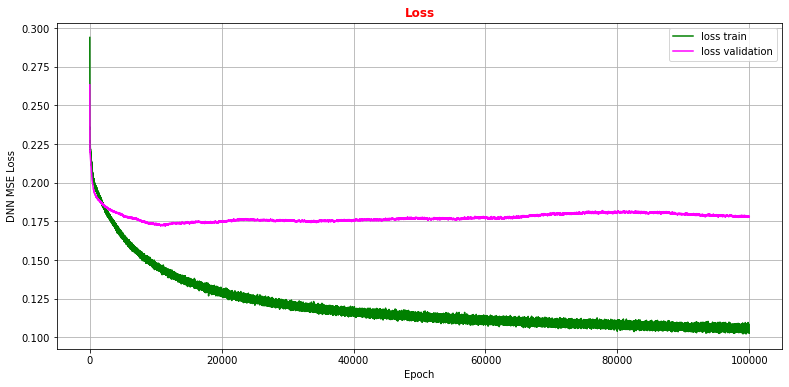

In [11]:
cl1.compile( loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'] )   ## <<== good

mlpfitted_1 = cl1.fit(x,y,epochs=100000, batch_size=len(y), verbose=0, validation_split=0.1)
cl1.evaluate(x,y)
print("Training Done")
# plot the loss fuction vs epoch during the training phase
# the plot of the loss function on the validation set is also computed and plotted
plt.rcParams['figure.figsize'] = (13,6)
plt.plot(mlpfitted_1.history['loss'], label='loss train',color='green')
plt.plot(mlpfitted_1.history['val_loss'], label='loss validation',color='magenta')
plt.title("Loss", fontsize=12,fontweight='bold', color='r')
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('DNN MSE Loss')
plt.grid("True")
plt.savefig("loss_vs_epocs_longertraining.png", dpi=300)